### Logistic Regression on Coronary Heart Disease data


Consider a coronary heart disease dataset which lists the age in years ('age') and the presence/absence of evidence of significant coronary heart disease ('chd') for 100 patients. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
chd = pd.read_csv("chd_data.csv")
chd

,age,chd
0,20,0
1,23,0
2,24,0
3,25,1
4,25,0
...,...,...
95,63,1
96,64,1
97,64,0
98,65,1


Text(0.5, 1.0, 'Age vs. Coronary Heart Disease')

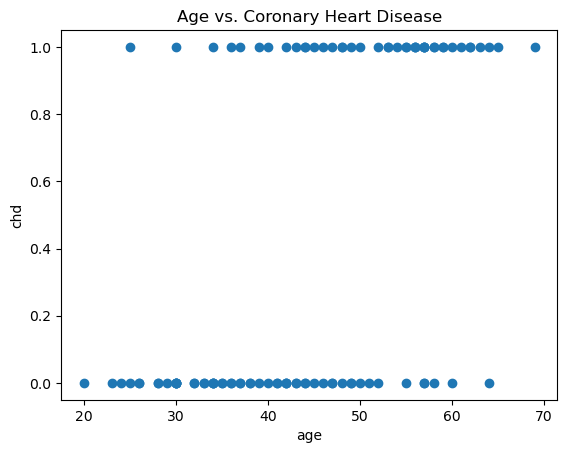

In [5]:
import matplotlib.pyplot as plt                       # Importing the required library
%matplotlib inline
                                                      # Plotting the 'chd' values against 'age' values
plt.scatter(chd["age"],chd["chd"])
plt.xlabel("age")
plt.ylabel("chd")
plt.title("Age vs. Coronary Heart Disease")


In [7]:
from sklearn.model_selection import train_test_split                 # Importing the required class
predictors = ["age"]                                                 # Specifying the columns as predictor and target variable
target = "chd"
x = chd[predictors]
y = chd[target]
xtrain, xtest,ytrain,ytest = train_test_split(x,y,test_size =0.3 , random_state =0) 
print("shape of xtrain:", xtrain.shape)                           # Spliting the data in training and test set in 70:30 ratio
print("shape of xtest:", xtest.shape)
print("shape of ytrain:", ytrain.shape)
print("shape of ytest:", ytest.shape)
                       

shape of xtrain: (70, 1)
shape of xtest: (30, 1)
shape of ytrain: (70,)
shape of ytest: (30,)
intercept: [-5.65118929] coeffecient : [[0.11144281]]


### Building logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()                          # Creating the object of the class LogisticRegression
model.fit(xtrain,ytrain)                              # Training the model using the training data
print("intercept:", model.intercept_, "coeffecient :", model.coef_) # Getting the intercept and the coefficients of the model

Using this logistic model, the probability of occurrence of coronary heart disease for a person aged 29 can be predicted as shown below

In [8]:
test = np.array([29]).reshape(1,-1)
print("predict the probability of the sample for class 0 and 1 respectively:", model.predict_proba(test))
print("predicted class is i.e whether chd is 0 or 1 is:", model.predict(test))

predict the probability of the sample for class 0 and 1 respectively: [[0.91829082 0.08170918]]
predicted class is i.e whether chd is 0 or 1 is: [0]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


The predicted probability for class '0' is higher than predicted probability of class '1' . So class '0' is chosen as the final target value for this instance.

Similarly, the probabilities for the class labels can be predicted for other samples.

In [9]:
test= np.array([20]).reshape(1,-1)    
print("predict the probability of the sample for class 0 and 1 respectively: ", model.predict_proba(test))
print("predicted class of the given sample is: ", model.predict(test))

predict the probability of the sample for class 0 and 1 respectively:  [[0.96839526 0.03160474]]
predicted class of the given sample is:  [0]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [11]:
test = np.array([30]).reshape(1,-1)
print("The probability of the sample for class 0 and 1 respectively is:", model.predict_proba(test))
print("The class the sample belong is :", model.predict(test))

The probability of the sample for class 0 and 1 respectively is: [[0.90952961 0.09047039]]
The class the sample belong is : [0]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Evaluate the model's performance on training and test data using 'accuracy' measure.

In [12]:
print("the accuracy of the model during training is :" , model.score(xtrain , ytrain))
print("the accuracy of the model during the validation is:", model.score(xtest,ytest))

the accuracy of the model during training is : 0.7428571428571429
the accuracy of the model during the validation is: 0.7333333333333333


The output shows that model is 74% accuracte in prediction. It can be assumed that the model is not overfitting to the training data because the accuracy on test data is similar to that of the training data

In [15]:
from sklearn.metrics import mean_squared_error
ytrainout = model.predict(xtrain)
ytestout = model.predict(xtest)
rmsetrain= mean_squared_error(ytrain, ytrainout)**0.5
rmsetest = mean_squared_error(ytest, ytestout)**0.5
print("RMSE train : ", rmsetrain)
print("RMSE test : ", rmsetest)

RMSE train :  0.50709255283711
RMSE test :  0.5163977794943222


In [16]:
ytestout = model.predict(xtest)
rmsetest = mean_squared_error(ytest, ytestout)**0.5
rmsetest

0.5163977794943222